<a href="https://colab.research.google.com/github/mahmud-nobe/Basic-Problems-Function/blob/master/Activity_2_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Compare Pre-Class Work
Paste your OOP code for the spring-mass simulation and compare. As you go on list down the best practices that you found while implementing these simulations.

If you want, you can use this skeleton code provided in the preclass work.


> 2-3 Code cell for students to paste and compare their codes



In [ ]:
# Test Case
m = 0.25 
k = 42

x0 = -1.5
v0 = 0.0
dt = 0.01

spring_mass = Spring_Mass(x0, v0, dt)
spring_mass.display()

for i in range(100):
    spring_mass.update()
    if i%10 == 0:
        spring_mass.display()

plt.plot(spring_mass.ts, spring_mass.xs)

plt.xlabel('Time (s)')
plt.ylabel('Distance From Equilibrium')

plt.legend()    
plt.show()

plt.plot(spring_mass.xs, spring_mass.vs)

plt.title('Distance vs Velocity Plot (Phase Diagram)')
plt.xlabel('Distance (m)')
plt.ylabel('Velocity (m/s)')

plt.legend()    
plt.show()

## Comparing Methods

Implement RK2 method in the simulation similar to RK4. Then compare the methods with varying stepsize and note down your findings.

## Damping 



In real life, spring do not oscillate forever due to damping and other external forces. Consider that the coefficient of friction is $\beta$. Change your simulation to include the effects of damping. Specially check how the "distance vs time" plot and "position vs velocity" plot (i.e. phase diagram) changes for damping.




> Code cell here



## Critical Damping (If time permits) 



When the damping coefficient is low, the system still oscilates but the amplitude decreases and it comes to rest eventually. It is called an **_underdamped system_**. If the coefficient increases, at one point the system comes to rest even without any oscilation, which is called **_critically damped_**.

Consider a system with m = 0.25 and k = 42. Using your simulation, estimate the critical value for the damping coefficient (i.e. at which value we start to get critically damped).



> Code cell here



## Solution

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def forwardEuler(f, t_i, y_i, dt):
  y_next = y_i + dt*f(t_i, y_i)
  return y_next

def rungeKutta2(f, t_i, y_i, dt):
  y_star = forwardEuler(f, t_i, y_i, dt)
  An = f(t_i, y_i)
  Bn = f(t_i + dt, y_star)
  better_slope = (An + Bn) / 2

  y_next = y_i + dt*better_slope
  return y_next 

def rungeKutta4(f, t_i, y_i, dt):
  f_1 = f(t_i, y_i)
  f_2 = f(t_i + dt/2, y_i + (1/2)*dt*f_1)
  f_3 = f(t_i + dt/2, y_i + (1/2)*dt*f_2)
  f_4 = f(t_i + dt, y_i + dt*f_3)

  y_next = y_i + (1/6)*dt*(f_1 + 2*f_2 + 2*f_3 + f_4)

  return y_next

In [4]:


class Spring_Mass:

    def __init__(self, x0, v0, dt, length = 3, m = 0.25, k = 42, damping = 0):

        self.length = length # length of the spring at rest
        self.xs = [x0] # initial position
        self.vs = [v0] # initial velocity
        self.m = m # mass of the object
        self.k = k # spring constant
        self.beta = damping # damping coefficient
        self.ts = [0.0]
        self.a_s = []
        self.dt = dt #timestep

        self.states = [(x0, v0)]

        self.omega = np.sqrt(self.k/self.m) 

    def get_acceleration(self):
        a_next = -1 * self.omega**2 * self.xs[-1]
        self.a_s.append(a_next)
    
    def derivatives(self, t, state):
        k = self.k
        m = self.m

        x = state[0]
        v = state[1]

        x_prime = v
        v_prime = -(k/m) * x

        return np.array((x_prime, v_prime))
    
    def update_euler(self):
        self.get_acceleration()
        v_next = self.vs[-1] + self.a_s[-1] * self.dt
        x_next = self.xs[-1] + self.vs[-1] * self.dt

        self.vs.append(v_next)
        self.xs.append(x_next)

        t_next = self.ts[-1] + self.dt
        self.ts.append(t_next)   

    def update_euler_cromer(self):
        self.get_acceleration()
        v_next = self.vs[-1] + self.a_s[-1] * self.dt
        x_next = self.xs[-1] + v_next * self.dt

        self.vs.append(v_next)
        self.xs.append(x_next)

        t_next = self.ts[-1] + self.dt
        self.ts.append(t_next)     

    def x_prime(self, t, v):
        # not really a function of t, but it could be
        return v

    def v_prime(self, t, x):
        # not really a function of t, but it could be...
        return -(self.k/self.m)*x

    def updateRK4(self):
        state_next = rungeKutta4(self.derivatives, self.ts[-1], self.states[-1], self.dt)
        self.states.append(state_next)

        t_next = self.ts[-1] + self.dt
        self.ts.append(t_next)

        self.xs.append(state_next[0])
        self.vs.append(state_next[1])

    def updateRK2(self):
        state_next = rungeKutta2(self.derivatives, self.ts[-1], self.states[-1], self.dt)
        self.states.append(state_next)

        t_next = self.ts[-1] + self.dt
        self.ts.append(t_next)

        self.xs.append(state_next[0])
        self.vs.append(state_next[1])

    def display(self):
        current_x = self.xs[-1]
        a = [-3, current_x]
        b = [0, 0]
        if a[-1] < 0:
            plt.plot(a, b, color = 'blue')
        else:
            plt.plot(a, b, color = 'green')
        plt.scatter([current_x],[0], s = 1000, color = 'red')
        plt.vlines(0, -2, 2, linestyles='dotted')

        plt.xlim(-3, 5)
        plt.title("Time = "+str(np.round(self.ts[-1], 2)))

        plt.show()
    
    def update_exact(self):
        x_next = x0 * np.cos(self.omega * self.ts[-1])
        v_next = -x0 * self.omega * np.sin(self.omega * self.ts[-1])
        
        self.xs.append(x_next)
        self.vs.append(v_next)

        t_next = self.ts[-1] + self.dt
        self.ts.append(t_next)

    def update(self, method = 'Euler'):
        if method == 'Euler':
            self.update_euler()
        elif method == 'RK4':
            self.updateRK4()
        elif method == 'RK2':
            self.updateRK2()
        elif method == 'exact':
            self.update_exact()
        else:
            self.update_euler_cromer()

In [14]:
t_final = 2

N_steps = np.array([400, 200, 100, 50, 40])

dt = t_final/N_steps
dt

array([0.005, 0.01 , 0.02 , 0.04 , 0.05 ])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

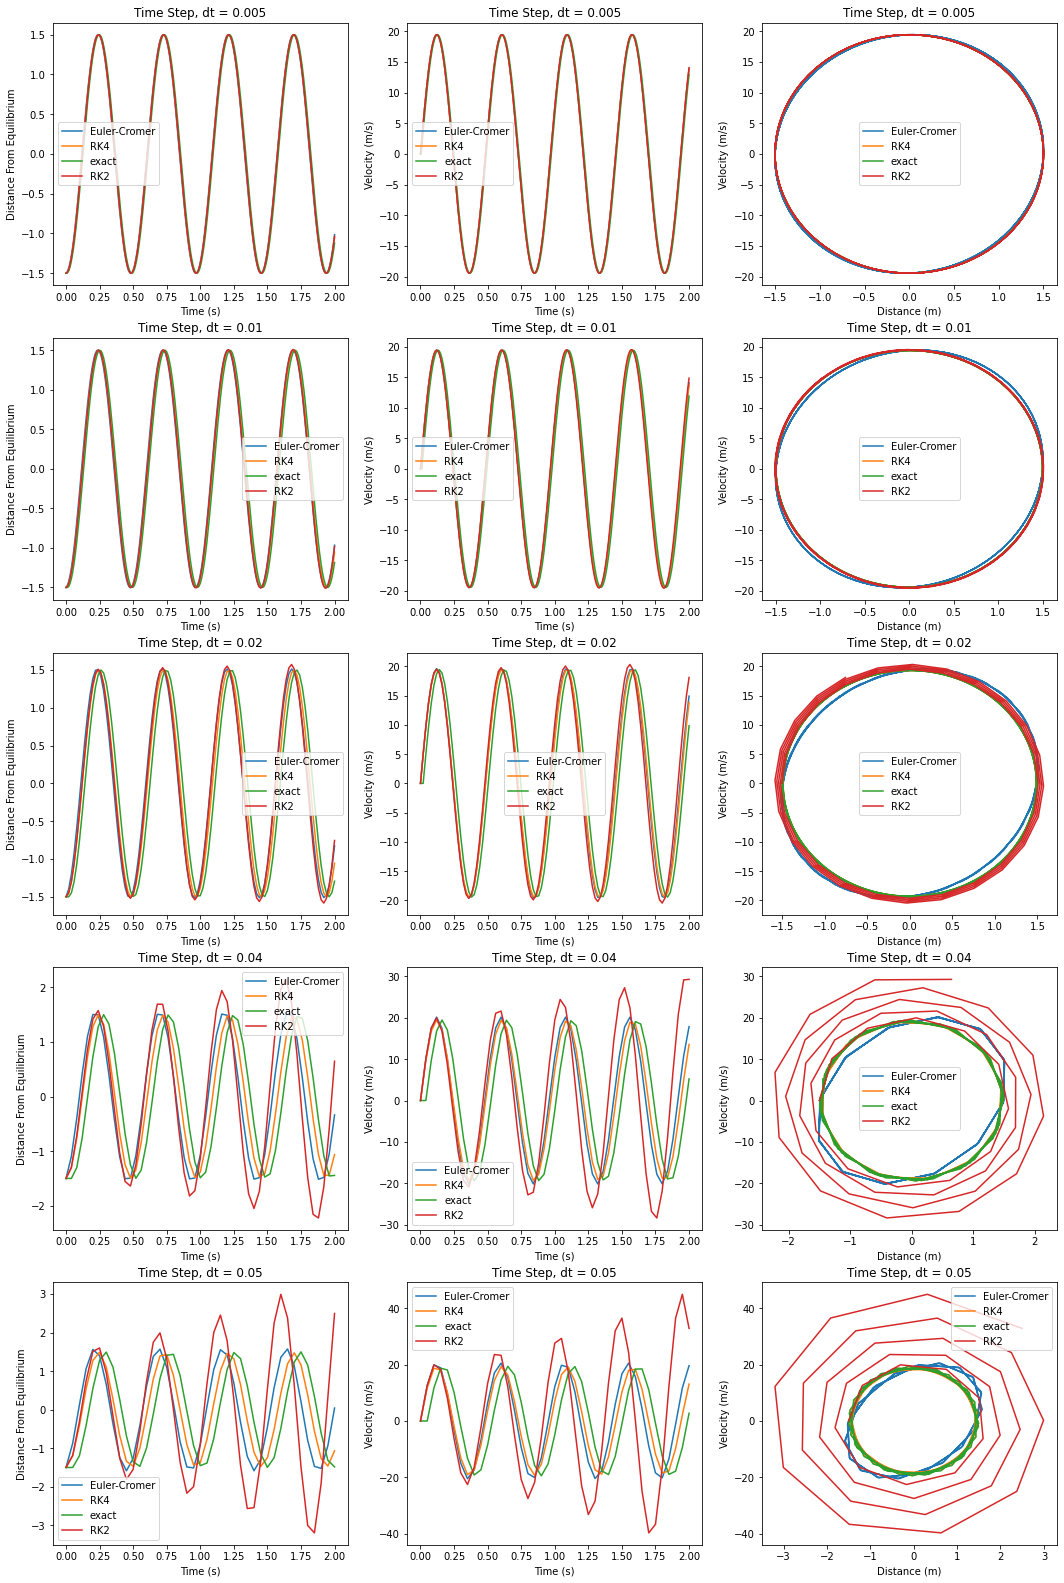

In [5]:
x0 = -1.5
v0 = 0.0
t_final = 2

stepsizes = np.array([0.005, 0.01, 0.02, 0.04, 0.05])

plt.figure(figsize = (18, 28))

for i in range(len(stepsizes)):
    dt = stepsizes[i]
    n_step = int(t_final / dt)
    
    methods = ['Euler-Cromer', 'RK4', 'exact', 'RK2']
    for method in methods:
        spring_mass = Spring_Mass(x0, v0, dt)

        for _ in range(n_step):
            spring_mass.update(method = method)

        plt.subplot(5, 3, 3*i + 1)
        plt.plot(spring_mass.ts, spring_mass.xs, label = method)
        plt.xlabel('Time (s)')
        plt.ylabel('Distance From Equilibrium')
        plt.legend()
        plt.title('Time Step, dt = '+ str(dt))

        plt.subplot(5, 3, 3*i + 2)
        plt.plot(spring_mass.ts, spring_mass.vs, label = method)
        plt.xlabel('Time (s)')
        plt.ylabel('Velocity (m/s)')
        plt.legend()
        plt.title('Time Step, dt = '+ str(dt))

        plt.subplot(5, 3, 3*i + 3)
        plt.plot(spring_mass.xs, spring_mass.vs, label = method)
        plt.xlabel('Distance (m)')
        plt.ylabel('Velocity (m/s)')
        plt.legend()
        plt.title('Time Step, dt = '+ str(dt))

plt.show()

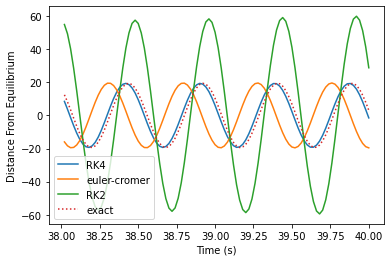

In [6]:
x0 = -1.5
v0 = 0.0
dt = 0.02

methods = ['RK4', 'euler-cromer', 'RK2']
for method in methods:
    spring_mass = Spring_Mass(x0, v0, dt)

    for i in range(2000):
        spring_mass.update(method = method)

    plt.plot(spring_mass.ts[-100:], spring_mass.vs[-100:], label = method)

spring_mass = Spring_Mass(x0, v0, dt)

for i in range(2000):
    spring_mass.update(method = 'exact')

plt.plot(spring_mass.ts[-100:], spring_mass.vs[-100:], ':', label = 'exact')


plt.xlabel('Time (s)')
plt.ylabel('Distance From Equilibrium')

plt.legend()    
plt.show()

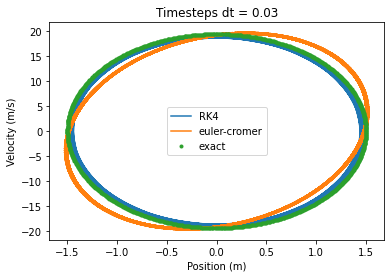

In [7]:
x0 = -1.5
v0 = 0.0
dt = 0.03

methods = ['RK4', 'euler-cromer']
for method in methods:
    spring_mass = Spring_Mass(x0, v0, dt)
    #spring_mass.display()

    for i in range(1000):
        spring_mass.update(method = method)
    #if i%200 == 0:
    #    spring_mass.display()

    plt.plot(spring_mass.xs[-1000:], spring_mass.vs[-1000:], label = method)

spring_mass = Spring_Mass(x0, v0, dt)

for i in range(1000):
    spring_mass.update(method = 'exact')

plt.plot(spring_mass.xs[-1000:], spring_mass.vs[-1000:], '.', label = 'exact')

plt.title('Timesteps dt = '+str(dt) )
plt.xlabel('Position (m)')
plt.ylabel('Velocity (m/s)')

plt.legend()    
plt.show()

### Damping:

In [9]:


class Spring_Mass:

    def __init__(self, x0, v0, dt, length = 3, m = 0.25, k = 42, damping = 0):

        self.length = length # length of the spring at rest
        self.xs = [x0] # initial position
        self.vs = [v0] # initial velocity
        self.m = m # mass of the object
        self.k = k # spring constant
        self.beta = damping # damping coefficient
        self.ts = [0.0]
        self.a_s = []
        self.dt = dt #timestep

        self.states = [(x0, v0)]

        self.omega = np.sqrt(self.k/self.m) 

    def get_acceleration(self):
        a_next = (1/self.m) * (-self.beta*self.vs[-1] - self.k*self.xs[-1])
        self.a_s.append(a_next)
    
    def derivatives(self, t, state):
        k = self.k
        m = self.m
        beta = self.beta

        x = state[0]
        v = state[1]

        x_prime = v
        v_prime = (1/m) * (-beta*v - k*x)

        return np.array((x_prime, v_prime))
    
    def update_euler(self):
        self.get_acceleration()
        v_next = self.vs[-1] + self.a_s[-1] * self.dt
        x_next = self.xs[-1] + self.vs[-1] * self.dt

        self.vs.append(v_next)
        self.xs.append(x_next)

        t_next = self.ts[-1] + self.dt
        self.ts.append(t_next)   

    def update_euler_cromer(self):
        self.get_acceleration()
        v_next = self.vs[-1] + self.a_s[-1] * self.dt
        x_next = self.xs[-1] + v_next * self.dt

        self.vs.append(v_next)
        self.xs.append(x_next)

        t_next = self.ts[-1] + self.dt
        self.ts.append(t_next)     

    def updateRK4(self):
        state_next = rungeKutta4(self.derivatives, self.ts[-1], self.states[-1], self.dt)
        self.states.append(state_next)

        t_next = self.ts[-1] + self.dt
        self.ts.append(t_next)

        self.xs.append(state_next[0])
        self.vs.append(state_next[1])

    def updateRK2(self):
        state_next = rungeKutta2(self.derivatives, self.ts[-1], self.states[-1], self.dt)
        self.states.append(state_next)

        t_next = self.ts[-1] + self.dt
        self.ts.append(t_next)

        self.xs.append(state_next[0])
        self.vs.append(state_next[1])

    def display(self):
        current_x = self.xs[-1]
        a = [-3, current_x]
        b = [0, 0]
        if a[-1] < 0:
            plt.plot(a, b, color = 'blue')
        else:
            plt.plot(a, b, color = 'green')
        plt.scatter([current_x],[0], s = 1000, color = 'red')
        plt.vlines(0, -2, 2, linestyles='dotted')

        plt.xlim(-3, 5)
        plt.title("Time = "+str(np.round(self.ts[-1], 2)))

        plt.show()
    
    def update_exact(self):
        x_next = x0 * np.cos(self.omega * self.ts[-1])
        v_next = -x0 * self.omega * np.sin(self.omega * self.ts[-1])
        
        self.xs.append(x_next)
        self.vs.append(v_next)

        t_next = self.ts[-1] + self.dt
        self.ts.append(t_next)

    def update(self, method = 'Euler'):
        if method == 'Euler':
            self.update_euler()
        elif method == 'RK4':
            self.updateRK4()
        elif method == 'RK2':
            self.updateRK2()
        elif method == 'exact':
            self.update_exact()
        else:
            self.update_euler_cromer()

In [21]:
np.random.uniform(-5,5)

0.8949864100169611

In [24]:
np.sqrt(4*0.25*42)

6.48074069840786

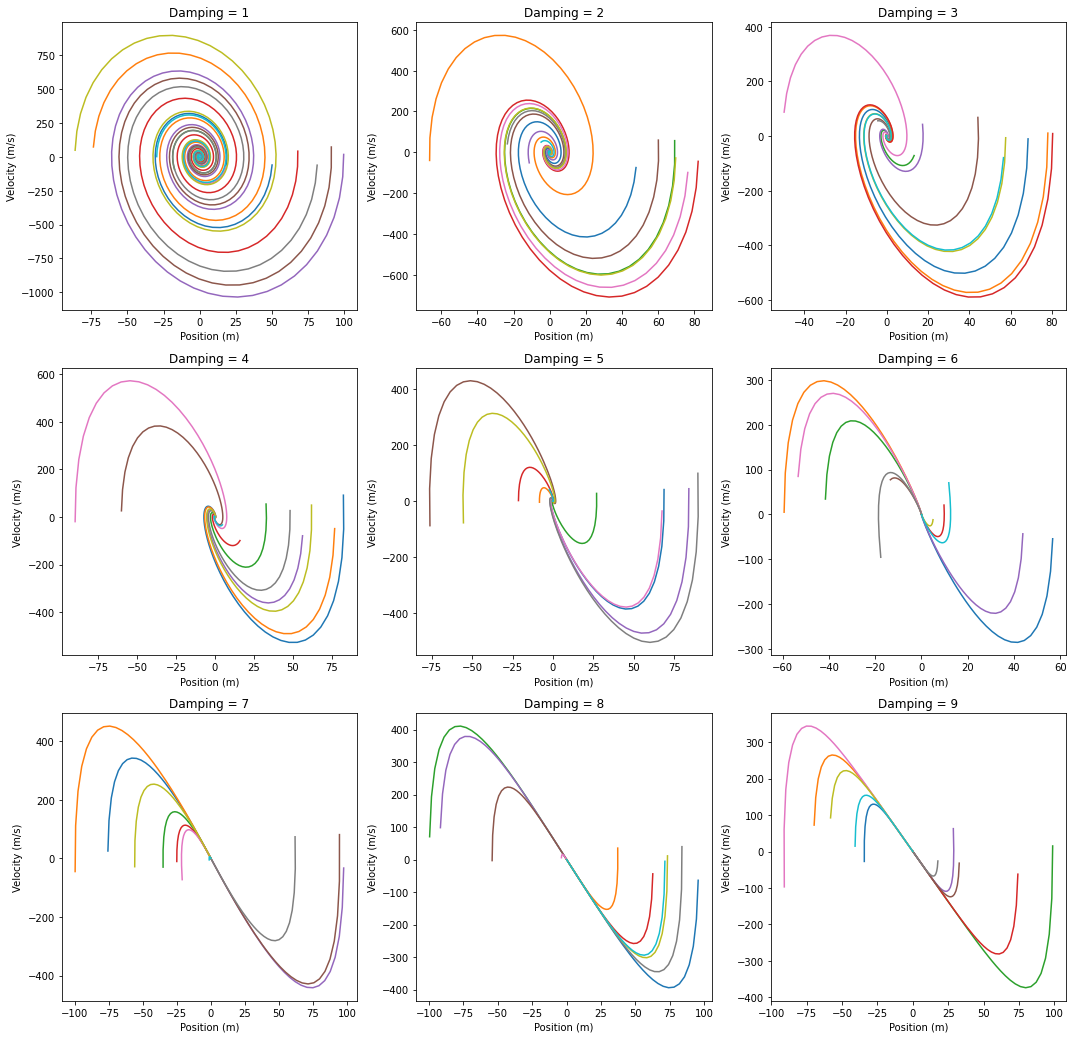

In [28]:
x0 = -1.5
v0 = 0
dt = 0.01
dampings = [1,2,3,4,5,6,7,8,9]
iterations = 10

plt.figure(figsize = (18, 18))

for i in range(len(dampings)):
    damping = dampings[i]

    plt.subplot(3,3,i+1)
    for _ in range(iterations):
        x0 = np.random.uniform(-100,100)
        v0 = np.random.uniform(-100,100)
        spring_mass = Spring_Mass(x0, v0, dt, damping = damping)

        for _ in range(200):
            spring_mass.update(method = 'RK4')

        plt.plot(spring_mass.xs, spring_mass.vs)

    plt.title('Damping = '+str(damping) )
    plt.xlabel('Position (m)')
    plt.ylabel('Velocity (m/s)')

    #plt.legend()    
plt.show()